<a href="https://colab.research.google.com/github/KadariPavani/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **SENTIMENT ANALYSIS**

---

In [77]:
#Python code here

fb1 = "The food at KFC is Awesome"
fb2 = " The food at KFC is very good"
fb3 = " The food at KFC is worst"
fb4 = "The food at KFC is just ok "

In [78]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer as NaiveBayesAnalyzer


In [79]:
blob1 = TextBlob(fb1)
blob2 = TextBlob(fb2)
blob3 = TextBlob(fb3)
blob4 = TextBlob(fb4)

In [80]:
print(blob1.sentiment)


Sentiment(polarity=1.0, subjectivity=1.0)


In [81]:
blob2.sentiment


Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [82]:
blob3.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [83]:
blob4.sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [84]:
#problem statement :
'''
Develop sentiment analysis model to classify reviews as +ve or -ve
Preprocess the review text using techniques such as lower casting, removing stop words and lematization.
use the trained model accurately predict the sentiment of new, unseen reviews
'''

'\nDevelop sentiment analysis model to classify reviews as +ve or -ve\nPreprocess the review text using techniques such as lower casting, removing stop words and lematization.\nuse the trained model accurately predict the sentiment of new, unseen reviews\n'

In [85]:
import pandas as pd  #datasets

In [86]:
data=pd.read_csv("Reviews.csv")    #reading the csv file
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [87]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [88]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [89]:
data.info()   #data types, entries of data set and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [90]:
data.isnull().sum()  #checking the null values

,0
Review,0
Liked,0


In [91]:
data.duplicated().sum()

6

In [92]:
#EDA Explotary data Analysis
#seaborn is the extension of matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

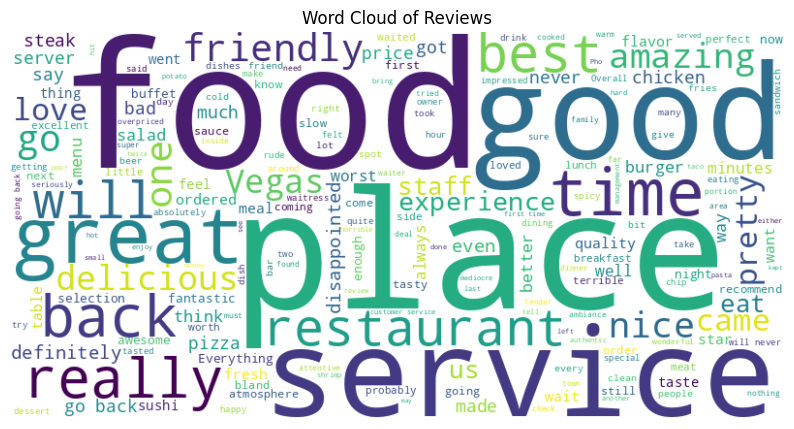

In [93]:
#combining all the reviews into one string

combine_text = " ".join(data["Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(combine_text)


#plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

In [94]:
from collections import Counter


targeted_words = ['good', 'great', 'amazing', 'bad', 'not bad']
all_words = " ".join(data["Review"]).lower().split()   #flatten reviews into a single list of word
word_counts = Counter(all_words)
target_word_count ={word: word_counts[word] for word in targeted_words}



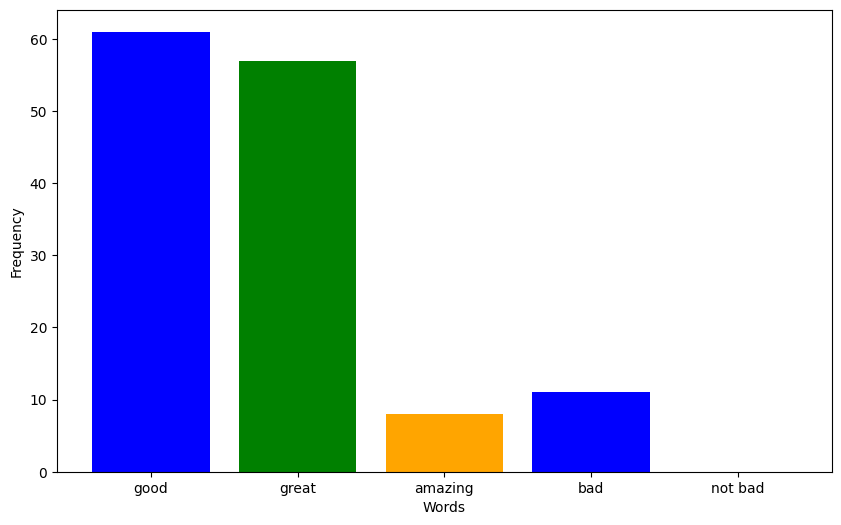

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(target_word_count.keys(), target_word_count.values(), color= ['blue' ,'green', 'orange'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()




##### **MAIN STEPS IN SENTIMENT ANALYSIS**

* Text preprocessing
  * Converting datsaset into lowercase
  * Tokenization (Dividing the sentense into small words)
  * Removing of stop words ('and','the',..)
* Explotary data analysis

In [96]:
# Text Preprocessing


In [97]:
#converting dataset into lowerset

lowecased_text = data["Review"].str.lower()   #data[column]and need to convert in lowercase
lowecased_text

,Review
0,wow... loved this place.
1,crust is not good.
2,not tasty and the texture was just nasty.
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone.
997,overall i was not impressed and would not go b...
998,"the whole experience was underwhelming, and i ..."


In [98]:
!pip install nltk


In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
#Tokenization

# divide the sentence into small pieces of words
# when a new data point is add it will also add to all the +ve and -ve
#Automatically recognizes

from nltk.tokenize import word_tokenize
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [102]:
#removing of stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [103]:
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
stop_words = stopwords.words('english')
data['Tokens'] = data['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [105]:
#Applying the stemming method --> reducing the common words(influnctional words)
#going ,go,went,gone
#It is the process of reducing words to its base or root form

In [106]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
data['stemmed'] = data['Tokens'].apply(lambda x: ' '.join( [ps.stem(item) for item in x]))
print(data['stemmed'])
#data['Stemmed'] = data['Review'].apply(lambda x: " ".join[ps.stem(item) for item in x])


0                                   wow ... love place .
1                                           crust good .
2                               not tasti textur nasti .
3      stop late may bank holiday rick steve recommen...
4                          the select menu great price .
                             ...                        
995                    i think food flavor textur lack .
996                             appetit instantli gone .
997                     overal i impress would go back .
998    the whole experi underwhelm , i think 'll go n...
999    then , i n't wast enough life , pour salt woun...
Name: stemmed, Length: 1000, dtype: object


In [107]:
data['stemmed'].value_counts()

,count
stemmed,
# name ?,4
will back !,2
i wo n't back .,2
i love place .,2
the food terribl .,2
...,...
there noth authent place .,1
spaghetti noth special whatsoev .,1
"of dish , salmon best , great .",1


In [108]:
#Lemmataization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [110]:
lemmatizer = WordNetLemmatizer()


In [111]:
data['Lemmatized'] = data['Tokens'].apply(lambda x: ' '.join( [lemmatizer.lemmatize(item) for item in x]))
print(data['Lemmatized'])

0                                  Wow ... Loved place .
1                                           Crust good .
2                              Not tasty texture nasty .
3      Stopped late May bank holiday Rick Steve recom...
4                       The selection menu great price .
                             ...                        
995                I think food flavor texture lacking .
996                            Appetite instantly gone .
997                  Overall I impressed would go back .
998    The whole experience underwhelming , I think '...
999    Then , I n't wasted enough life , poured salt ...
Name: Lemmatized, Length: 1000, dtype: object


In [112]:
#Removing the numbers
import re
data['No_Numbers'] = data['Review'].str.replace(r'\d+', '')
print(data['No_Numbers'])

#or
#data['No_Numbers'] = data['Review'].apply(lambda x :re.sub(r'\d+',' ',x))


0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [113]:
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [115]:
#the food is awesome @xyz hotel
#To remove the special characters like #,@ we use normalization

#convert the text into standardized manner
!pip install contractions

In [116]:
#normalization
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [117]:
#Removing the emojis
!pip install emoji


In [118]:
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [119]:
#removing HTML tags
#Means removing the links that written in the reviews
!pip install beautifulsoup4

In [120]:
from bs4 import BeautifulSoup
data['cleaned'] = data['Review'].apply(lambda x : BeautifulSoup(x,'html.parser').get_text())


<ipython-input-120-93fd28ba3a2c>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned'] = data['Review'].apply(lambda x : BeautifulSoup(x,'html.parser').get_text())


In [121]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object



Project is based on social media reviews.
Machine unable to understand all the patterns
Machine learning model will automatically

* Dataset in excel
* Implement text data preprocessing techniques
* Data cleaning

upto this all this is clean

* Building ML Model
*


In [122]:
# TF-IDF Vectorizer :
# TF = Term Frequency , IDF = Inverse Document Frequency
# Convert text data into matrix form
# r -->
# c -->

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
data = [
    "The sun is bright",
    "The sky is blue",
    "The sun is the sky is bright ",
    "we can see the shining sun, the bright sun"
    ]

In [125]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
print(tfidf_matrix.toarray())
print(tfidf_vectorizer.get_feature_names_out())

[[0.         0.52210862 0.         0.52210862 0.         0.
  0.         0.52210862 0.42685801 0.        ]
 [0.65919112 0.         0.         0.42075315 0.         0.
  0.51971385 0.         0.34399327 0.        ]
 [0.         0.31312182 0.         0.62624363 0.         0.
  0.38676774 0.31312182 0.5119952  0.        ]
 [0.         0.23910199 0.37459947 0.         0.37459947 0.37459947
  0.         0.47820398 0.39096309 0.37459947]]
['blue' 'bright' 'can' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'])


In [161]:
#Naive basis model is only used in text data for more accuraete

#Building machine Learning model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [162]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
import pandas as pd  #datasets
data=pd.read_csv("Reviews.csv")    #reading the csv file
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [129]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Review'])
y = data['Liked']


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report # Import


In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
print(X_train, X_test, y_train, y_test)

  (0, 1778)	0.3196494189359375
  (0, 1938)	0.20794801889277578
  (0, 2005)	0.45560954528848707
  (0, 1516)	0.5587881819736206
  (0, 1527)	0.578582388550776
  (1, 263)	0.2799840341995038
  (1, 62)	0.5164170315313603
  (1, 1471)	0.27255492663992104
  (1, 613)	0.3202666685240094
  (1, 1180)	0.35549258822909835
  (1, 622)	0.4193390530637026
  (1, 711)	0.4193390530637026
  (2, 1938)	0.21704341786509082
  (2, 1571)	0.3198299691276987
  (2, 1618)	0.5102287539842273
  (2, 699)	0.3031291394604372
  (2, 1962)	0.48790050997574835
  (2, 1057)	0.5102287539842273
  (3, 1796)	0.18893179507753172
  (3, 1194)	0.2006808020306405
  (3, 1471)	0.29501353406759745
  (3, 590)	0.33614831815132157
  (3, 821)	0.37508854376741335
  (3, 1791)	0.3192733609259723
  (3, 719)	0.30305480231081033
  :	:
  (797, 1911)	0.46801741316672485
  (798, 63)	0.09941818111459709
  (798, 1938)	0.2228482091437908
  (798, 944)	0.14171411086951774
  (798, 1776)	0.1774987010047913
  (798, 1206)	0.14757149730549846
  (798, 890)	0.29074

In [132]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [133]:
y_pred =model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report =classification_report(y_test, y_pred)
print(report)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Accuracy: 0.8


In [134]:
#Final step

#predict sentiment analysis for new reviews

def predict_sentiment(new_review):
  cleaned_review = preprocess_text(new_review)
  x_new = vectorizer.transform([cleaned_review])
  sentiment = model.predict(vectorized_review)
  return model.predict(x_new)[0]

In [152]:
def predict_sentiment(new_review):
  # Define the preprocess_text function here, or import it if it's defined elsewhere.
  def preprocess_text(text):


    return text  # Replace with your actual preprocessing steps

  cleaned_review = preprocess_text(new_review)
  x_new = vectorizer.transform([cleaned_review])
  # Assuming 'model' and 'vectorizer' are defined elsewhere
  return model.predict(x_new)[0]


In [159]:
new_reviews = input("Enter a new review: ")
predicted_sentiment = predict_sentiment(new_reviews)
print("Predicted Sentiment:", predicted_sentiment)
if predicted_sentiment == 1:
    print("Positive")
else:
    print("Negative")



Enter a new review: Amazing
Predicted Sentiment: 1
Positive
